In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# this is what is created when you run charlies feature code
df = pd.read_csv('optiver_training_data/all_columns_features.csv')

In [3]:
df.head()

stock_id  date_id  seconds_in_bucket  imbalance_size  \
0         0        0                  0      3180602.69   
1         1        0                  0       166603.91   
2         2        0                  0       302879.87   
3         3        0                  0     11917682.27   
4         4        0                  0       447549.96   

   imbalance_buy_sell_flag  reference_price  matched_size  far_price  \
0                        1         0.999812   13380276.64   1.001713   
1                       -1         0.999896    1642214.25   1.001713   
2                       -1         0.999561    1819368.03   1.001713   
3                       -1         1.000171   18389745.62   1.001713   
4                       -1         0.999532   17860614.95   1.001713   

   near_price  bid_price  ...  \
0     0.99966   0.999812  ...   
1     0.99966   0.999896  ...   
2     0.99966   0.999403  ...   
3     0.99966   0.999999  ...   
4     0.99966   0.999394  ...   

   reference_price_seconds_in_bucket_group_mean_ratio  \
0                                           1.000136    
1                                           1.000052    
2                                           1.000387    
3                                           0.999777    
4                                           1.000416    

   matched_size_seconds_in_bucket_group_rank  \
0                                   0.204188   
1                                   0.874346   
2                                   0.821990   
3                                   0.151832   
4                                   0.162304   

   ask_price_seconds_in_bucket_group_rank  \
0                                0.931937   
1                                0.183246   
2                                0.434555   
3                                0.560209   
4                                0.958115   

   bid_price_seconds_in_bucket_group_rank  \
0                                0.497382   
1                                0.272251   
2                                0.795812   
3                                0.005236   
4                                0.806283   

   ask_size_seconds_in_bucket_group_rank  \
0                               0.685864   
1                               0.439791   
2                               0.455497   
3                               0.010471   
4                               0.958115   

   bid_size_seconds_in_bucket_group_rank wap_seconds_in_bucket_group_rank  \
0                               0.104712                         0.005236   
1                               0.827225                         0.010471   
2                               0.225131                         0.015707   
3                               0.874346                         0.020942   
4                               0.445026                         0.026178   

   near_price_seconds_in_bucket_group_rank  \
0                                 0.005236   
1                                 0.010471   
2                                 0.015707   
3                                 0.020942   
4                                 0.026178   

   far_price_seconds_in_bucket_group_rank  \
0                                0.005236   
1                                0.010471   
2                                0.015707   
3                                0.020942   
4                                0.026178   

   reference_price_seconds_in_bucket_group_rank  
0                                      0.659686  
1                                      0.554974  
2                                      0.811518  
3                                      0.287958  
4                                      0.842932  

[5 rows x 130 columns]

In [4]:
# using sci kit like in cs 74
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.metrics import mean_absolute_error


### remember the MAE with all 0 was 6.4077673733353055 while the MAE with guess just looking at imbalance buy sell flag was 6.407053280199083, as improvement of 0.0007140931362226155

In [ ]:
# Separate features and target
X = df.drop(columns=['target'])
y = df['target']

# Split into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Lasso regression model with cross-validation
# cv=3 means 3-fold cross-validation.
lasso_cv = LassoCV(cv=3, random_state=42)

# Fit the model on the training data
lasso_cv.fit(X_train, y_train)

# Predict on the test set
y_pred = lasso_cv.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Test MAE:", mae)

Test MAE: 6.396547329093609


In [6]:
print("Coefficients:", lasso_cv.coef_)
print("Intercept:", lasso_cv.intercept_)

Coefficients: [ 0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  3.50853107e-16  4.93483899e-16  1.89108749e-15
 -6.08327287e-16 -2.06638106e-18  3.16206636e-16 -3.35831596e-16
  1.47139860e-14 -6.09335459e-14  1.76855646e-14 -1.59424141e-16
  2.7413073

In [7]:
# Get indices where the coefficient is not zero
non_zero_indices = np.where(lasso_cv.coef_ != 0)[0]

# Get the corresponding column names from X_train
non_zero_features = X_train.columns[non_zero_indices]
print("Features with non-zero weights:", list(non_zero_features))

Features with non-zero weights: ['near_price_far_price_reference_price_imb2', 'bid_price_far_price_reference_price_imb2', 'bid_price_near_price_reference_price_imb2', 'bid_price_near_price_far_price_imb2', 'ask_price_far_price_reference_price_imb2', 'ask_price_near_price_reference_price_imb2', 'ask_price_near_price_far_price_imb2', 'ask_price_bid_price_reference_price_imb2', 'ask_price_bid_price_far_price_imb2', 'ask_price_bid_price_near_price_imb2', 'wap_far_price_reference_price_imb2', 'wap_near_price_reference_price_imb2', 'wap_near_price_far_price_imb2', 'wap_bid_price_reference_price_imb2', 'wap_bid_price_far_price_imb2', 'wap_bid_price_near_price_imb2', 'wap_ask_price_far_price_imb2']


## doesnt tell you anything but wanted to see if there was a pattern where the prediction error were

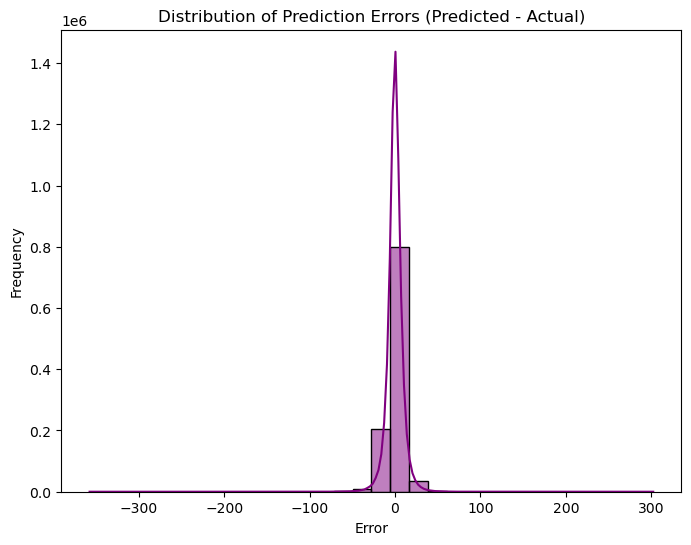

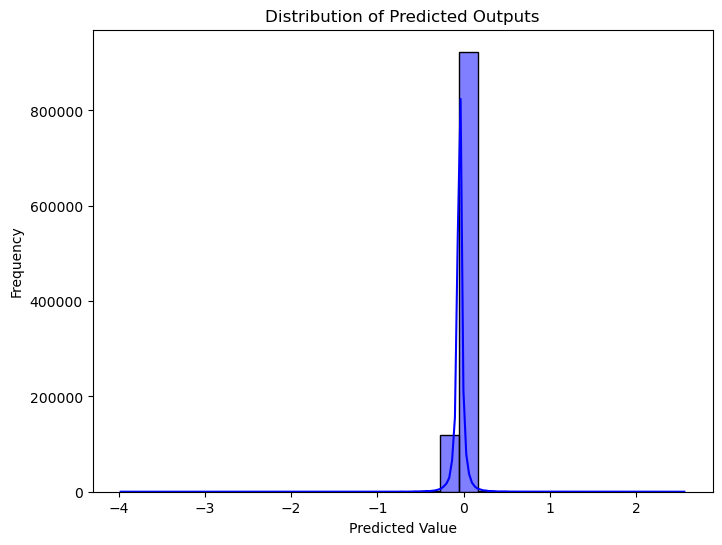

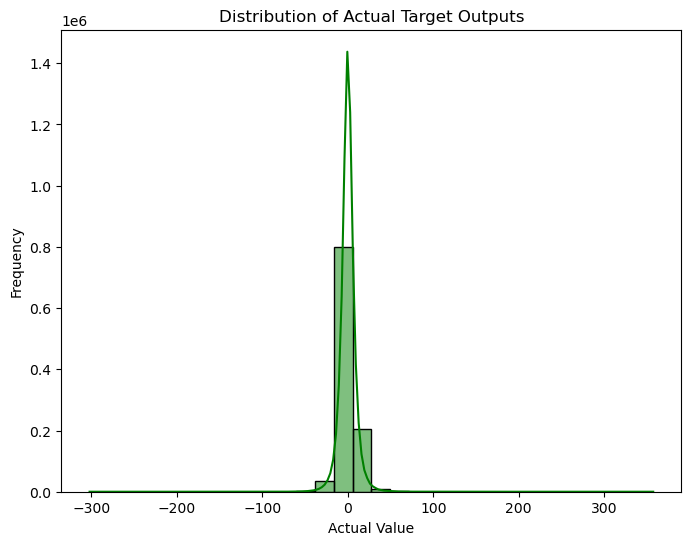

In [8]:
# Calculate errors (prediction error for each test sample)
errors = y_pred - y_test

# Plot distribution of prediction errors
plt.figure(figsize=(8, 6))
sns.histplot(errors, kde=True, color='purple', bins=30)
plt.title("Distribution of Prediction Errors (Predicted - Actual)")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.show()

# Plot distribution of predicted outputs
plt.figure(figsize=(8, 6))
sns.histplot(y_pred, kde=True, color='blue', bins=30)
plt.title("Distribution of Predicted Outputs")
plt.xlabel("Predicted Value")
plt.ylabel("Frequency")
plt.show()

# Plot distribution of actual target outputs
plt.figure(figsize=(8, 6))
sns.histplot(y_test, kde=True, color='green', bins=30)
plt.title("Distribution of Actual Target Outputs")
plt.xlabel("Actual Value")
plt.ylabel("Frequency")
plt.show()

## again, not that important but wanted to what percentage of errors were really big and what not, and then confirm in the training set we find the same thing. really just looking to see if easy way to do this 

In [21]:
threshold = 5
# Convert y_test and y_pred to NumPy arrays if they aren't already
y_test_arr = np.array(y_test)
y_pred_arr = np.array(y_pred)

# Compute absolute errors for each prediction
errors = np.abs(y_pred_arr - y_test_arr)

# Determine the proportion of predictions with an error of 1 or less
percentage = np.mean(errors <= threshold) * 100

print(f"Percentage of predictions with absolute error <= {threshold}: {percentage:.2f}%")

Percentage of predictions with absolute error <= 5: 54.31%


In [39]:
abs_x_train = np.abs(np.array(y_train))

In [49]:
extreme_value_threshold = 10
percentage = np.mean(abs_x_train <= extreme_value_threshold) * 100

print(f"Percentage of training test with absolute error <= {extreme_value_threshold}: {percentage:.2f}%")

Percentage of training test with absolute error <= 10: 80.79%


In [55]:
thr = 10
unique_count = df[df['target'].abs() > thr]['stock_id'].nunique()
print(f"Number of unique stock_id values where target > {thr}:", unique_count)
# everyone

Number of unique stock_id values where target > 10: 200


In [56]:
stock_percentages = df.groupby('stock_id').apply(
    lambda x: (x['target'].abs() > thr).mean() * 100
)

print(f"Percentage of rows with |target| > {thr} for each stock:")
print(stock_percentages)

# really doesnttell us much but except all stocks kinda suck in large changes so permforming indiviual one
# per stock wouldnt be that helpful as obv hot encoding doesnt work in linea regression

Percentage of rows with |target| > 10 for each stock:
stock_id
0       8.614629
1      33.354753
2      27.446607
3       5.915706
4       8.455868
         ...    
195     9.450009
196    13.834814
197    19.104139
198     8.168588
199    21.475827
Length: 200, dtype: float64


/var/folders/8g/qrcsyg5j4sv3k84llyv3fqhc0000gn/T/ipykernel_82562/2318227182.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stock_percentages = df.groupby('stock_id').apply(


# looking at compariosn of values to target for each column. see no pattern. also data so large this was done by random sample

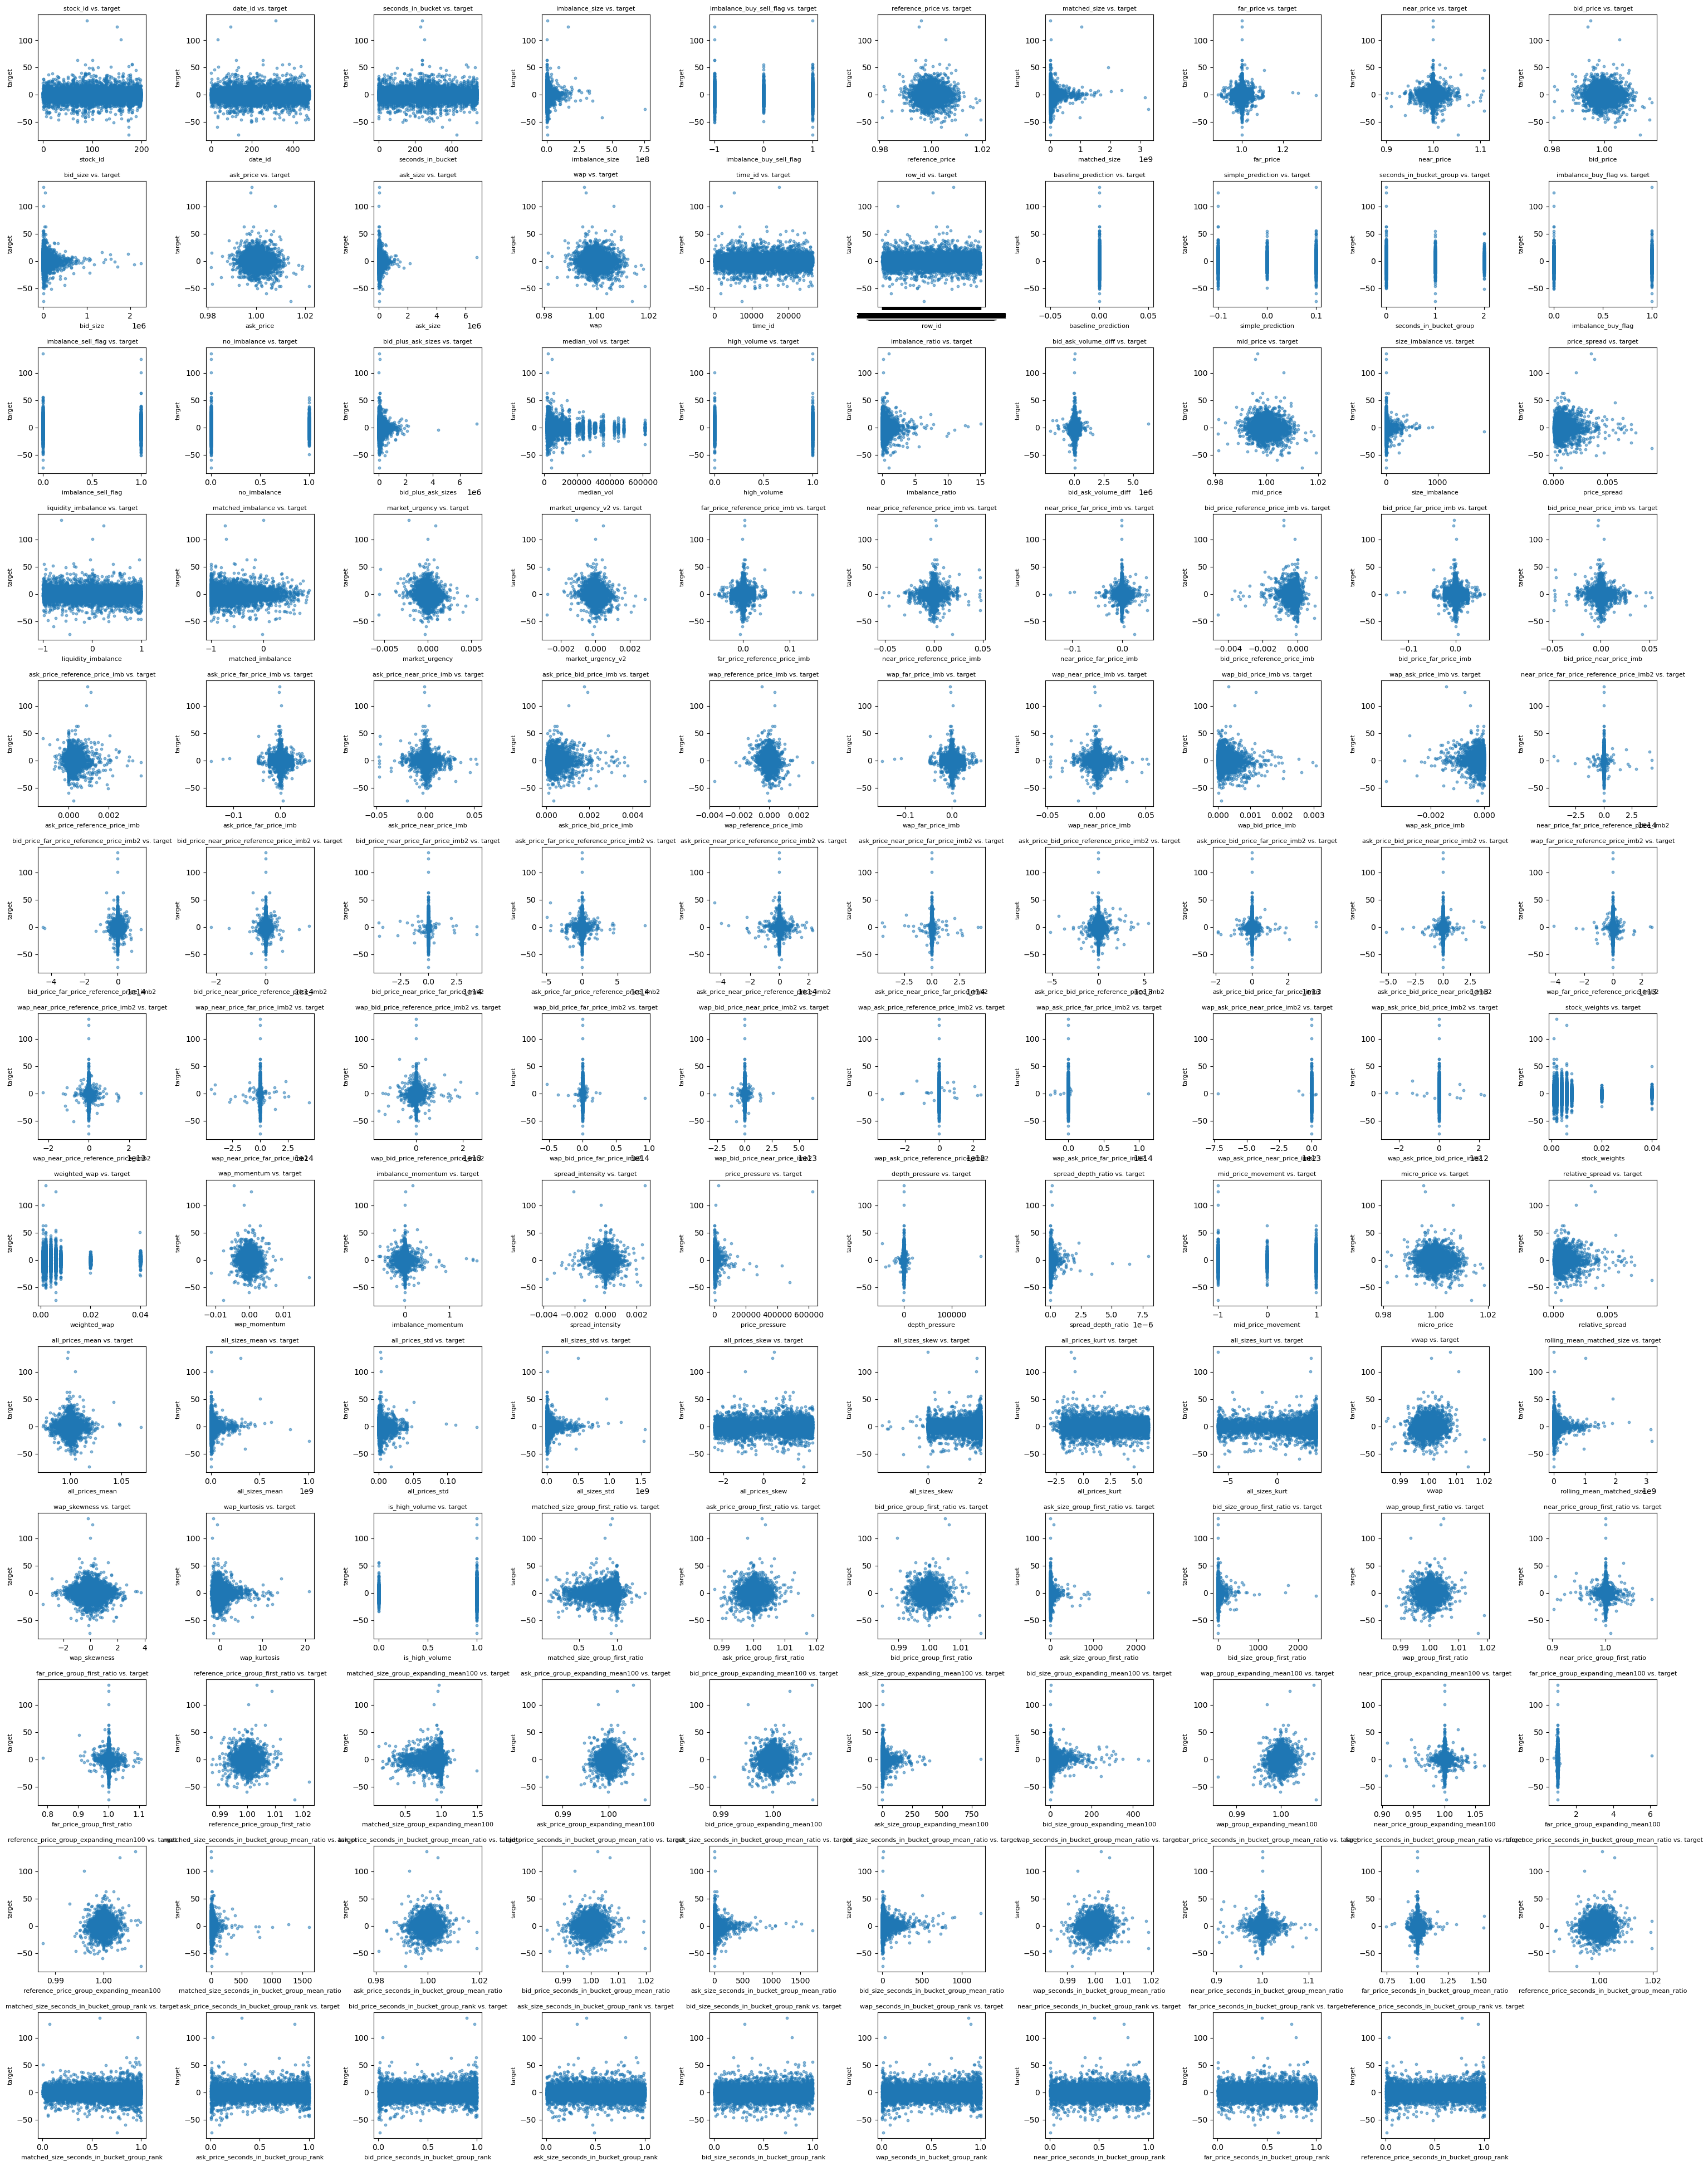

In [22]:

# If the DataFrame is very large, sample a subset for plotting:
# was not working unless i did this sampling
df_sample = df.sample(n=10000, random_state=42) if len(df) > 10000 else df

target = 'target'
features = [col for col in df.columns if col != target]

n_features = len(features)
n_cols = 10  # number of subplots per row
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 3, n_rows * 3))
axes = axes.flatten()

for ax, feature in zip(axes, features):
    ax.scatter(df_sample[feature], df_sample[target], s=10, alpha=0.5)
    ax.set_xlabel(feature, fontsize=8)
    ax.set_ylabel(target, fontsize=8)
    ax.set_title(f'{feature} vs. {target}', fontsize=8)

# Hide any extra subplots if there are not enough features.
for ax in axes[len(features):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

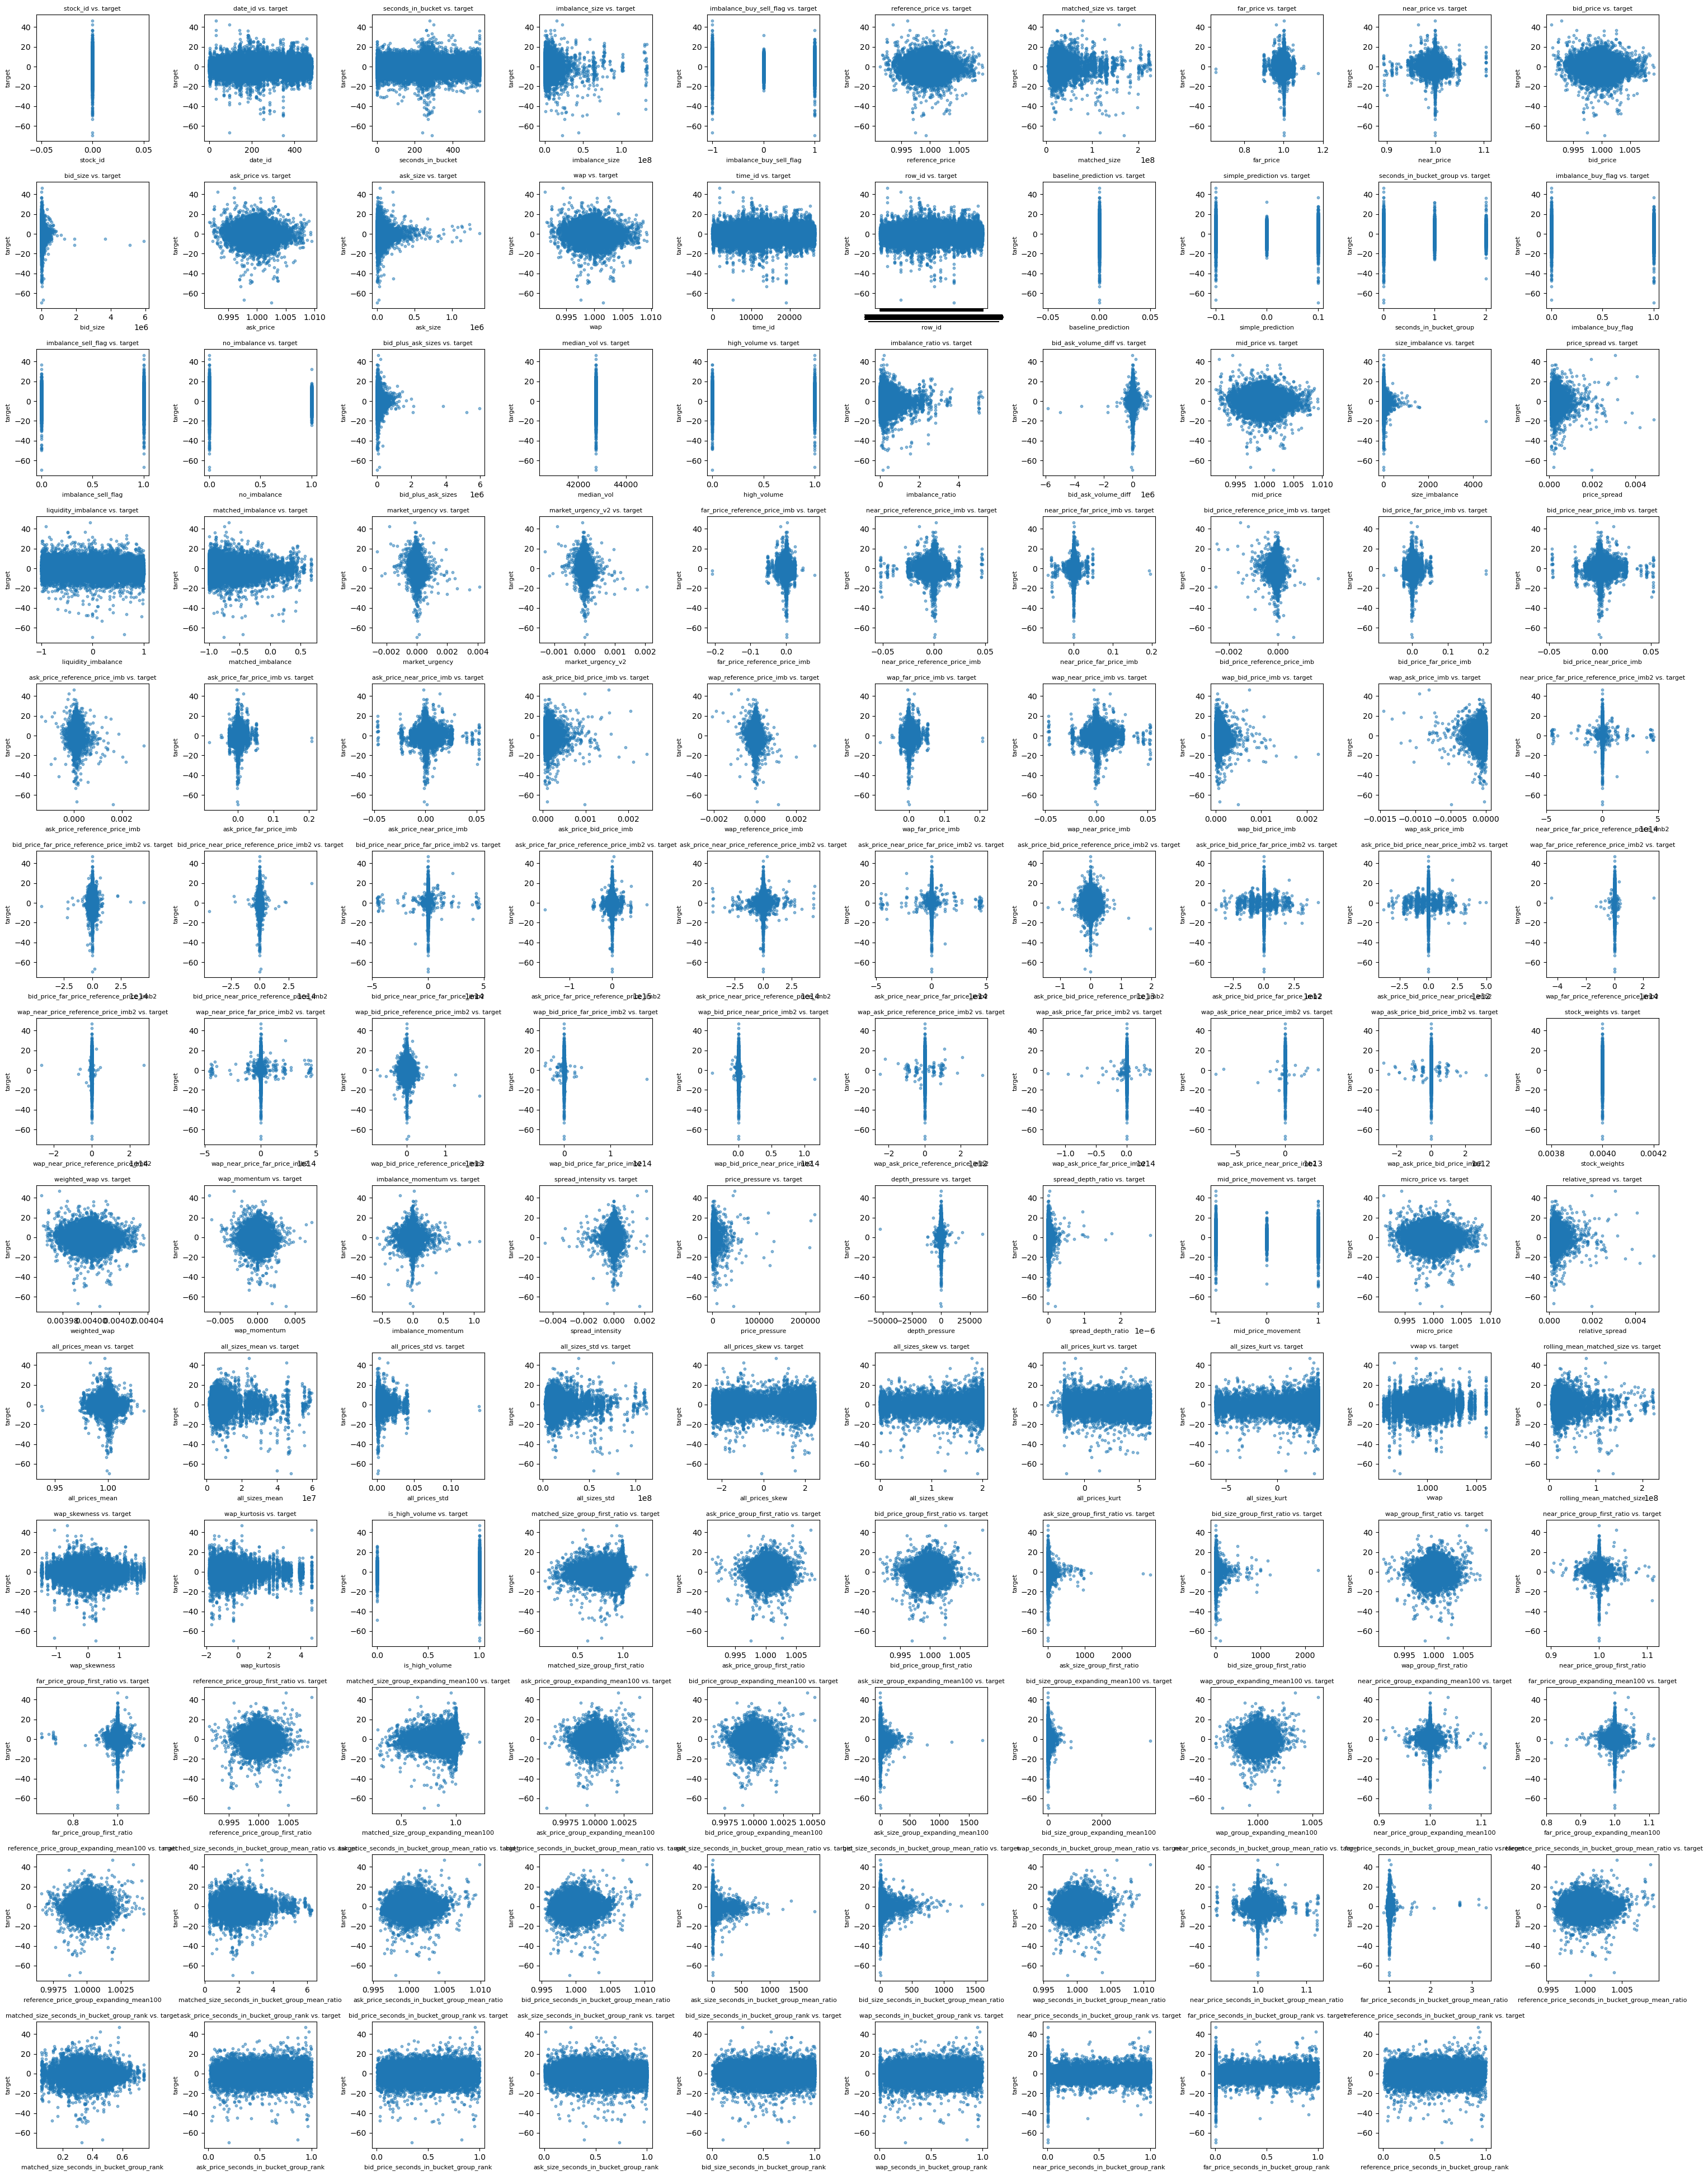

In [57]:

# look just at first stock and not do sampling
df_sample = df[df['stock_id'] == 0]

target = 'target'
features = [col for col in df.columns if col != target]

n_features = len(features)
n_cols = 10  # number of subplots per row
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 3, n_rows * 3))
axes = axes.flatten()

for ax, feature in zip(axes, features):
    ax.scatter(df_sample[feature], df_sample[target], s=10, alpha=0.5)
    ax.set_xlabel(feature, fontsize=8)
    ax.set_ylabel(target, fontsize=8)
    ax.set_title(f'{feature} vs. {target}', fontsize=8)

# Hide any extra subplots if there are not enough features.
for ax in axes[len(features):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()


# results are still very shit, not really any variables that look important

Visualization of MAE Values

In [8]:
from tabulate import tabulate
import pandas as pd

# Example data (adjust with your actual values)
base = 6.4077673733353055
imbal = 6.407053280199083
linear = 6.396547329093609
cat_boost = 5.580018873496161
cnn = 6.1233

models = ["No Change", "Imbalance Model", "Linear Model", "CatBoost Model", "1D CNN Model"]
maes = [base, imbal, linear, cat_boost, cnn]

# Create the DataFrame
df = pd.DataFrame({'Model': models, 'MAE': maes})
df['Baseline MAE Improvement'] = base - df['MAE']
df = df.round(4)

# Print a pretty table using tabulate
print(tabulate(df, headers='keys', tablefmt='fancy_grid', showindex=False))



╒═════════════════╤════════╤════════════════════════════╕
│ Model           │    MAE │   Baseline MAE Improvement │
╞═════════════════╪════════╪════════════════════════════╡
│ No Change       │ 6.4078 │                     0      │
├─────────────────┼────────┼────────────────────────────┤
│ Imbalance Model │ 6.4071 │                     0.0007 │
├─────────────────┼────────┼────────────────────────────┤
│ Linear Model    │ 6.3965 │                     0.0112 │
├─────────────────┼────────┼────────────────────────────┤
│ CatBoost Model  │ 5.58   │                     0.8277 │
├─────────────────┼────────┼────────────────────────────┤
│ 1D CNN Model    │ 6.1233 │                     0.2845 │
╘═════════════════╧════════╧════════════════════════════╛
